In [1]:
import MetaTrader5 as mt5
import numpy as np
import joblib
import matplotlib.pyplot as plt
from datetime import datetime, timezone

print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)



MetaTrader5 package author:  MetaQuotes Ltd.
MetaTrader5 package version:  5.0.45


In [2]:
if not mt5.initialize():
    print('Initialization failed, check internet connection. You must have Meta Trader 5 installed.')
    mt5.shutdown()

else:
    print(mt5.account_info()._asdict())
    print("\n")
    print(mt5.terminal_info()._asdict())
    print("\n")
    print(mt5.symbols_total())
    
    
# you code here

{'login': 5015722610, 'trade_mode': 0, 'leverage': 100, 'limit_orders': 200, 'margin_so_mode': 0, 'trade_allowed': True, 'trade_expert': True, 'margin_mode': 2, 'currency_digits': 2, 'fifo_close': False, 'balance': 10001.62, 'credit': 0.0, 'profit': 49.34, 'equity': 10050.96, 'margin': 50.99, 'margin_free': 9999.97, 'margin_level': 19711.629731319863, 'margin_so_call': 50.0, 'margin_so_so': 30.0, 'margin_initial': 0.0, 'margin_maintenance': 0.0, 'assets': 0.0, 'liabilities': 0.0, 'commission_blocked': 0.0, 'name': 'mike bright', 'server': 'MetaQuotes-Demo', 'currency': 'USD', 'company': 'MetaQuotes Software Corp.'}


{'community_account': True, 'community_connection': True, 'connected': True, 'dlls_allowed': False, 'trade_allowed': True, 'tradeapi_disabled': False, 'email_enabled': False, 'ftp_enabled': False, 'notifications_enabled': False, 'mqid': False, 'build': 4024, 'maxbars': 100000, 'codepage': 0, 'ping_last': 168679, 'community_balance': 0.0, 'retransmission': 1.079786974153515

In [3]:
account = mt5.account_info()
terminal = mt5.terminal_info()

print(account.equity)

if(terminal.connected == True and terminal.trade_allowed == True):
    print("AI is successfully functional")
else:
    print("Please make sure metatrade 5 has internet and algo Trade is Turn On")
    mt5.shutdown()

10050.97
AI is successfully functional


In [4]:
#rates = mt5.copy_rates_from_pos("GBPUSD", mt5.TIMEFRAME_H1, 0, 99999)  
target_market = ["GBPUSD","USDCAD","XAUUSD"]

In [12]:
n = 0

In [13]:
model = joblib.load(target_market[n]+" regressor.joblib")
sc_x = joblib.load(target_market[n]+" sc_x.joblib")
sc_y = joblib.load(target_market[n]+" sc_y.joblib")

In [14]:
#dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')])]
rates = mt5.copy_rates_from_pos(target_market[n], mt5.TIMEFRAME_H4, 0, 500)
print(rates[0][0])
print(rates.shape)
data = []
close_price = []
open_price = []

for i in range(len(rates)):
    data.append([rates[i][0],rates[i][1],rates[i][5]])
    open_price.append(rates[i][1])
    close_price.append(rates[i][4])
data = np.array(data)
close_price = np.array(close_price)
#print(data)
print(close_price[-1:])

1687363200
(500,)
[1.22134]


In [15]:
data = sc_x.transform(data)
y_pred = model.predict(data)
#print(y_pred)

In [16]:
y_pred = sc_y.inverse_transform(y_pred.reshape((len(y_pred),1)))
y_pred = y_pred.reshape(-1)
#print(y_pred)


In [17]:
def r_squared(y_true, y_pred):
  """Calculates the R-squared score.

  Args:
    y_true: The ground truth values.
    y_pred: The predicted values.

  Returns:
    The R-squared score.
  """

  mean_y_true = np.mean(y_true)
  ss_tot = np.sum((y_true - mean_y_true)**2)
  ss_res = np.sum((y_true - y_pred)**2)
  r_squared = 1 - ss_res / ss_tot
  return r_squared

#y_pred = regressor.predict(x_test)
#y_pred = y_pred.reshape(-1)
r_squared = r_squared(close_price[-100:], y_pred[-100:])

print(r_squared)

0.971633029149407


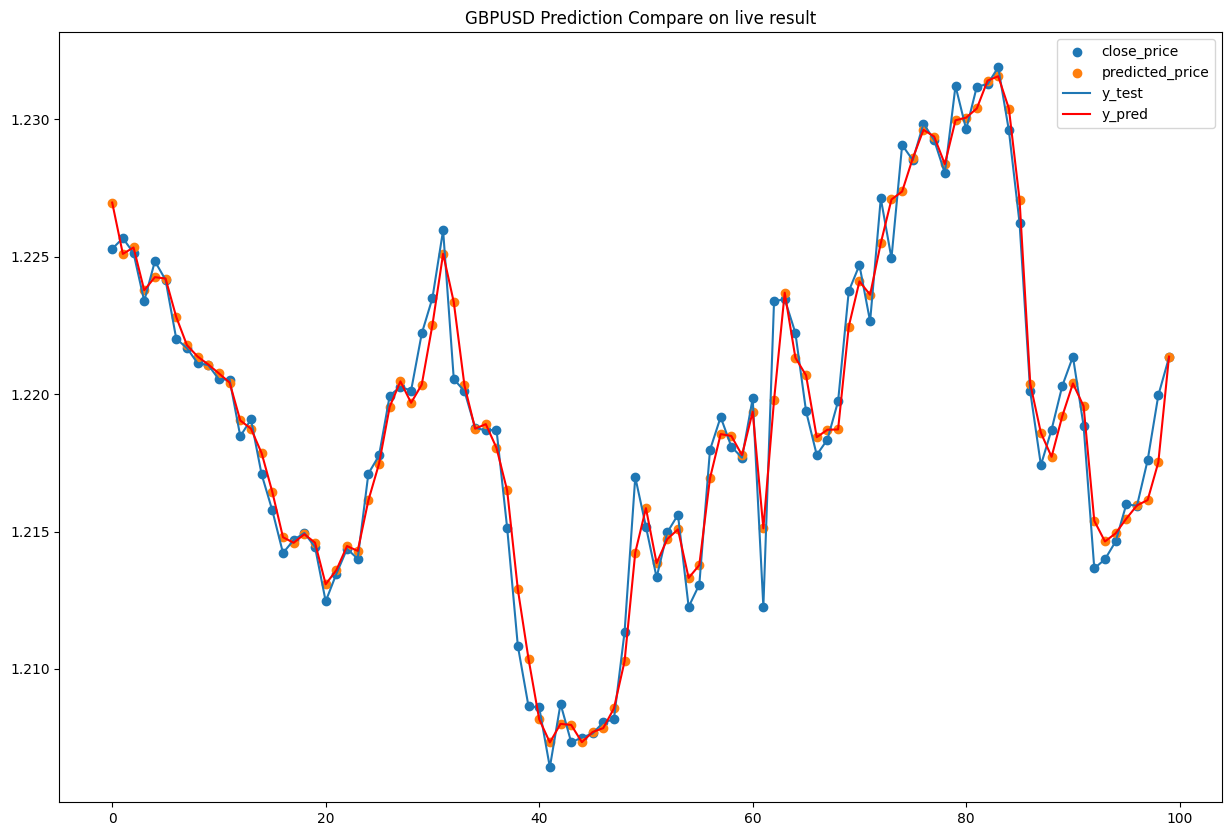

In [18]:
plt.figure(figsize=(15, 10))
plt.title(target_market[n]+" Prediction Compare on live result")
x_point = []
for i in range(len(close_price[-100:])):
  t = [i]
  x_point.append(t)
plt.scatter(x_point, close_price[-100:], label="close_price")
plt.scatter(x_point, y_pred[-100:], label="predicted_price")
plt.plot(close_price[-100:], label="y_test")
#plt.plot(open_price[-200:], label = "open price")
y_pred = model.predict(data[-100:])
y_pred = sc_y.inverse_transform(y_pred.reshape((len(y_pred),1)))
y_pred = y_pred.reshape(-1)
plt.plot(
    y_pred,
    label="y_pred", color="red"
)



plt.legend()

plt.show()

In [19]:
data = sc_x.inverse_transform(data)


In [20]:
# creating an assumption on the system
print(close_price[-1:])
print(data[-1:,:])
y_pred = model.predict(sc_x.transform(data[-1:,:]))
y_pred = sc_y.inverse_transform(y_pred.reshape((len(y_pred),1)))
y_pred = y_pred.reshape(-1)
print(y_pred)



[1.22134]
[[1.6974864e+09 1.2199700e+00 4.6960000e+03]]
[1.22136763]


In [21]:
# set time zone to UTC
# Convert Unix epoch time to UTC time
utc_time = datetime.fromtimestamp(int(data[-1,0]))


# Extract the hour and minutes from the UTC datetime object
year = utc_time.year
month = utc_time.month
day = utc_time.day
hour = utc_time.hour
minutes = utc_time.minute

# Print the hour and minutes
# Print the results
print("Year:", year)
print("Month:", month)
print("Day:", day)
print("Hour:", hour)
print("Minutes:", minutes)

Year: 2023
Month: 10
Day: 16
Hour: 21
Minutes: 0


In [22]:
#trade operation
if(terminal.connected == True and terminal.trade_allowed == True):
    print("AI is functional")
    total_order = mt5.positions_total()
    print(total_order)
    
    
else:
    print("Please make sure metatrade 5 has internet and algo Trade is Turn On")

AI is functional
4


In [24]:
# Get the current datetime in UTC
now_utc = datetime.utcnow()

# Convert the UTC datetime to GMT +0
now_gmt0 = now_utc.astimezone(timezone.utc)

# Get the year, month, day, and hour from the GMT +0 datetime
year = now_gmt0.year
month = now_gmt0.month
day = now_gmt0.day
hour = now_gmt0.hour
mins = now_gmt0.minute
# Print the results
print("Year:", year)
print("Month:", month)
print("Day:", day)
print("Hour:", hour)
print("Minute:", mins)

Year: 2023
Month: 10
Day: 16
Hour: 16
Minute: 57


In [45]:
lot = 0.01
symbol = "GBPUSD"
price = mt5.symbol_info_tick(symbol).bid
if(y_pred[-1] > price):
    price = mt5.symbol_info_tick(symbol).ask
    #buying a market
    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": lot,
        "type": mt5.ORDER_TYPE_BUY,
        "price": price,
        "sl": 0.0,
        "tp": 0.0,
        "deviation": 20,
        "magic": 0,
        "comment": "Dbot_ML",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
elif(y_pred[-1] < price):
    price = mt5.symbol_info_tick(symbol).bid
    #buying a market
    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": lot,
        "type": mt5.ORDER_TYPE_SELL,
        "price": price,
        "sl": 0.0,
        "tp":0.0,
        "deviation": 20,
        "magic": 0,
        "comment": "Dbot_ML",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
result=mt5.order_send(request)
print(result)

OrderSendResult(retcode=10018, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Market closed', request_id=2098276545, retcode_external=0, request=TradeRequest(action=1, magic=0, order=0, symbol='GBPUSD', volume=0.01, price=1.21471, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=0, type_filling=2, type_time=0, expiration=0, comment='Dbot_ML', position=0, position_by=0))


In [39]:
print(mt5.positions_total())

3


In [42]:
order_symbols = mt5.positions_get()
n = 1
for order_symbol in order_symbols:
    print(order_symbol.symbol)
    if(target_market[n] == order_symbol.symbol):
        print("seen")
        target_order = order_symbol
        break

print(target_order)
o_price = target_order.price_open
c_price = target_order.price_current
profit = target_order.profit
lot_size = target_order.volume
order_type = target_order.type
tp = target_order.tp
sl = target_order.sl

print("open price ", o_price)
print("close_price ",c_price)
print("profit ",profit)
print("lot size ",lot_size)
print("order type ",order_type)

USDCHF
USDCAD
seen
TradePosition(ticket=50764878607, time=1697054762, time_msc=1697054762903, time_update=1697054762, time_update_msc=1697054762903, type=1, magic=0, identifier=50764878607, reason=0, volume=0.01, price_open=1.36079, sl=0.0, tp=0.0, price_current=1.36136, swap=-0.01, profit=-0.42, symbol='USDCAD', comment='', external_id='')
open price  1.36079
close_price  1.36136
profit  -0.42
lot size  0.01
order type  1


In [27]:

#modify the market

request = {
    "action": mt5.TRADE_ACTION_SLTP,
    "symbol": target_order.symbol,
    "sl": 0.0,
    "tp": y_pred[-1],
    "position": target_order.ticket
}

result=mt5.order_send(request)
print(result)

OrderSendResult(retcode=10009, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Request executed', request_id=111532076, retcode_external=0, request=TradeRequest(action=6, magic=0, order=0, symbol='GBPUSD', volume=0.0, price=0.0, stoplimit=0.0, sl=0.0, tp=1.2213676333333343, deviation=0, type=0, type_filling=0, type_time=0, expiration=0, comment='', position=50758476285, position_by=0))


In [44]:
result = mt5.Close(target_order.symbol,ticket=target_order.ticket)
print(result)

False


In [22]:
print(mt5.last_error())
print(price)

(1, 'Success')
1.2278


: 

In [2]:
import time

for i in range(10):
    print("Hi ", i)
    time.sleep(5)

Hi  0
Hi  1
Hi  2
Hi  3
Hi  4
Hi  5
Hi  6
Hi  7
Hi  8
Hi  9
